# Proyecto Modulo 2

+ Integrante1: Corrales Camacho Cuauhtémoc
+ Integrante2: Sánchez Covarrubias Marco Antonio
+ Integrante3: Serrano Silva Alejandro

### *"Análisis de rendimientos de compañías automotrices y predicciones de precios para el año 2020"*

### **Objetivo general:**
+ Elaborar un análisis de precios y rendimientos accionarios de corporaciones automovilísticas.

### **Objetivos específicos:**
+ Investigar los valores accionarios del periodo 2018-2019 de empresas automotrices económicas. 
+ Calcular los rendimientos porcentuales de las compañías anteriores.
+ Predecir precios accionarios del próximo año para cada empresa correspondiente.

### **Planteamiento del proyecto**

Durante el estudio de este modulo, se han visto en clase los siguientes temas: Simulación Montecarlo, Integración Montecarlo, Fractales Aleatorios y Probabilidad Precio Umbral. Para la elaboración de este proyecto, se eligió el último tópico, ya que todos los integrantes del equipo son estudiantes de finanzas. Se decidió poner en desarrollar el tema de Probabilidad Precio Umbral porque es el más relacionado al área de nuestra carrera. 

El proyecto consiste en un análisis considerablemente detallado acerca de los valores accionarios que las empresas automototrices Ford, Volkswagen, Honda y Nissan generaron desde el inicio del año 2018 hasta la actualidad. Con ellos se calcularan los rendimientos en un determinado periodo de tiempo mediante el uso de un sistema probabilístico.

Al final, con los resultados obtenidos, se calcularan matematicamente una lista de posibles precios accionarios futuros y se daran a conocer nuestras conclusiones finales.

### **Modelo del problema**

Para importar los datos historícos se hará uso de una función que extraiga el cúmulo de datos del sitio web "Yahoo Finanzas". Dicha función requerirá los siguientes parámetros:
+ El nombre del conjunto de acciones (**names**).
+ La fecha de inicio de los datos (**start**).
+ La fecha de límite de los datos (**end**).

Al ejecutar dicha función se le agregará el operador "*.dropna*" para que las filas de valores que serán representados en una tabla de formato pandas no contengan celdas sin valores.

Más tarde, se procesaran los precios mediante una función logarítmica para calcular los rendimientos diarios.

Después se calculará la media y la desviación estandar de los rendimentos obtenidos. Esto se debe a que para calcular los rendimientos futuros por medio de un proceso probabilístico se necesita utilizar la fórmula de la densidad de la distribuición normal, la cual es:

$$1/(\sigma\sqrt(2\pi))\exp(-(x-\mu)^2)/2\sigma^2$$

En donde $\sigma$ representa la varianza, o en nuestro caso la desviación estandar; $\mu$ representa la media muestral y $x$ representa la variable del sistema. En nuestro caso, se contará con cuatro ecuaciones probabilísticas, cada una con sus respectivas desviaciones estandar y medias muestrales. La simbología que se usará sera **"std"** para la desviaciónes estandar y se agregará la *inicial de la empresa* al término; del mismo modo se hará con la media muestral y la simulación de rendimientos, solo que su simbología será **"mu"** y **"Sim_Ret"** más correspondientemente. 

Después se aplicará la fórmula anterior para definir una función que simule escenarios aleatorios de los próximos rendimientos en un intervalo determinado. Dicha función tendrá los siguientes parametros:
+ La media (**mu**).
+ La desviación estandar (**std**).
+ El ciclo en días (**ndays**).
+ El número de escenarios requeridos (**nscen**).
+ La fecha de inicio de la predicción (**fecha_inicio**).



In [1]:
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Histórico**

In [2]:
#Se importa el historico
def get_close(names,start,end):
    close=web.DataReader(name=names,data_source='yahoo',start=start,end=end)
    return close['Adj Close']

In [3]:
#Instrumentos
nombres=['F','VOW3.DE','HMC','NSANY']
# Fechas de interés (inicio y fin): 2013-2017
fecha_inicio='2018-01-01'
fecha_fin='2019-7-5'
# Función DataReader
cierres=get_close(nombres,fecha_inicio,fecha_fin).dropna()
print("Esta es la tabla de datos con la cual se trabajará")
cierres

Esta es la tabla de datos con la cual se trabajará


Symbols,F,HMC,NSANY,VOW3.DE
Date,,,,
2018-01-02,11.226595,33.041203,18.506634,156.690155
2018-01-03,11.315272,33.338268,18.700565,162.118057
2018-01-04,11.510363,33.980312,18.682095,164.954941
2018-01-05,11.705453,34.133633,18.829853,169.456100
2018-01-08,11.661115,34.306122,18.876028,170.061310
2018-01-09,11.599042,34.037807,18.968376,170.439560
2018-01-10,11.554701,34.766090,19.014551,168.510483
2018-01-11,11.669983,34.584023,19.162310,168.132233
2018-01-12,11.732057,34.430698,19.162310,170.042404


### **Solución del problema y sus respectivas gráficas**

Los datos de la anterior tabla éstan representados por la gráfica debajo.


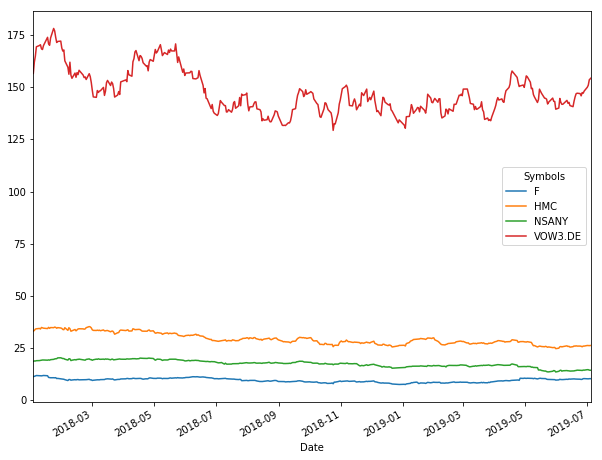

In [4]:
print("Los datos de la anterior tabla éstan representados por la gráfica debajo.")
cierres.plot(figsize=(10,8));

**En este caso, la simbología es la siguiente:**
+ *F* representa a Ford Motros Inc.
+ *HMC* representa a Honda Motors Corp.
+ *NSANY* representa a Nissan Motors Co.
+ *VOW3.DE* representa a Volkswagen AG.

**Simulación de rendimientos diarios**

In [5]:
#Simulacion de rendimientos diarios
# Calcular a diferencia logarítmica de precios y graficarlos
St=cierres
St1=cierres.shift()

Esta es la gráfica de los rendimientos diarios


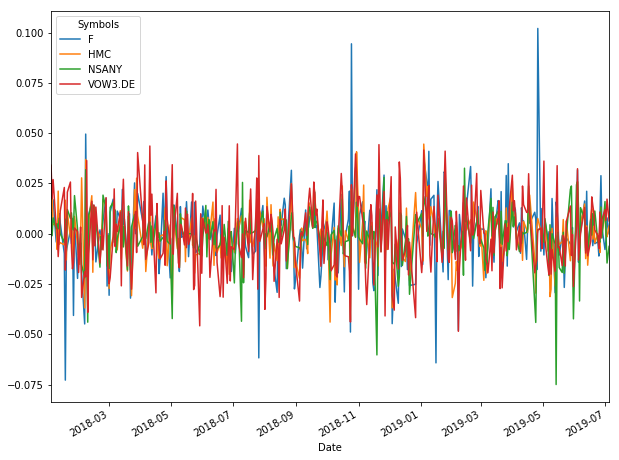

In [6]:
Ret=(np.log(St/St1)).dropna()
print("Esta es la gráfica de los rendimientos diarios")
Ret.plot(figsize=(10,8));

In [7]:
# Calculamos media 
muf=Ret.mean().F #Ford
muv=Ret.mean()['VOW3.DE'] #Volkswagen
muh=Ret.mean().HMC #Honda
mun=Ret.mean().NSANY #Nissan


print('El calculo de las medias es:')
muf,muv,muh,mun

El calculo de las medias es:


(-0.0002598856606974845,
 -3.639334657032583e-05,
 -0.000632855891273087,
 -0.0007159439147932965)

In [8]:
# Calculamos desviación estándar
stdf=Ret.std().F  #Ford
stdv=Ret.std()['VOW3.DE'] #Volkswagen
stdh=Ret.std().HMC #Honda
stdn=Ret.std().NSANY #Nissan
print('El calculo de la desviación estándar es:')
stdf,stdv,stdh,stdn

El calculo de la desviación estándar es:


(0.01757653794706786,
 0.01728273049722626,
 0.01293766233373254,
 0.01231562296875445)

**Simulación escenarios de rendimientos**

In [9]:
#Se define una función para simular diversos escenarios de rendimientos. 
def ret_simu(mu,std,ndays,nscen,fecha_inicio):
    dias = pd.date_range(start=fecha_inicio,periods=ndays)
    f_norm = std*np.random.randn(ndays,nscen) + mu
    return pd.DataFrame(data=f_norm,index=dias)

In [10]:
ndays = 539   #Este es el número de días restantes del 2019 más el año 2020
nscen = 50
fecha_inicio = "2019-7-9"

sim_Ret_F = ret_simu(muf,stdf,ndays,nscen,fecha_inicio)

sim_Ret_V = ret_simu(muv,stdv,ndays,nscen,fecha_inicio)

sim_Ret_H = ret_simu(muh,stdh,ndays,nscen,fecha_inicio)

sim_Ret_N = ret_simu(mun,stdn,ndays,nscen,fecha_inicio)

In [11]:
print("Esta es la simulación de rendimientos de Ford Motors Inc")
sim_Ret_F

Esta es la simulación de rendimientos de Ford Motors Inc


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-07-09,-0.017906,-0.014562,0.007441,-0.007502,-0.004739,0.007727,-0.030938,0.006820,-0.047274,-0.015603,...,0.015120,0.007648,0.027858,-0.012999,-0.005325,-0.001663,0.041496,-0.013435,-0.007146,0.017483
2019-07-10,-0.025274,-0.030441,-0.009675,-0.003946,-0.001330,-0.012117,-0.036384,0.000532,0.023968,-0.003421,...,0.019478,0.026636,-0.015379,0.005370,0.008728,-0.001936,-0.024245,-0.007000,-0.014668,0.022593
2019-07-11,0.032685,0.006859,-0.006615,-0.026693,0.005136,-0.002047,-0.008808,0.016941,0.000923,-0.001352,...,-0.006528,0.045281,0.005772,0.021192,-0.003968,-0.020471,0.003928,0.015183,0.013864,-0.005738
2019-07-12,-0.019523,-0.006135,-0.017422,-0.031364,-0.001673,-0.028667,0.014021,0.014185,0.016341,0.006089,...,0.034042,-0.008801,0.011885,0.009812,0.004582,0.001226,0.020105,-0.021443,-0.050775,0.012897
2019-07-13,0.021684,-0.023096,-0.007365,-0.008051,0.002549,-0.022534,0.020808,0.010746,0.025957,-0.000020,...,0.028381,0.007344,0.010533,0.008822,0.034148,0.000890,-0.011201,-0.010978,-0.013554,-0.006965
2019-07-14,-0.012907,0.023051,-0.001190,0.015770,0.004418,0.017606,0.001226,0.003150,0.023295,-0.007909,...,-0.008283,-0.032497,-0.003760,-0.009162,0.004340,-0.028971,0.017465,-0.044230,0.025248,-0.019585
2019-07-15,0.015190,-0.014260,0.014623,0.034310,-0.014912,0.003066,-0.006605,0.005575,0.016285,-0.019994,...,-0.020460,0.016354,-0.013935,-0.000616,-0.007589,0.005301,0.033379,-0.010978,-0.024033,-0.009654
2019-07-16,-0.021160,0.009372,0.001720,-0.015817,0.018535,-0.028316,0.008351,-0.007403,-0.001082,-0.014434,...,0.006975,0.014632,0.028988,-0.004319,0.007500,0.014418,0.003917,-0.021414,-0.003597,0.034027
2019-07-17,-0.006991,0.013232,0.001721,-0.011074,-0.005227,-0.016568,0.015337,0.010919,0.005113,0.003944,...,0.020571,-0.012854,0.002575,-0.020992,-0.008607,-0.004599,-0.003011,0.021956,-0.026258,-0.009117
2019-07-18,-0.049418,-0.005619,0.014438,-0.028637,-0.020290,-0.013248,0.022156,0.024671,0.006378,-0.038226,...,0.010253,0.013412,-0.008060,0.009564,-0.006855,-0.012872,-0.031758,-0.007675,0.005937,0.006357


In [12]:
print("Esta es la simulación de rendimientos de Volkswagen AG")
sim_Ret_V

Esta es la simulación de rendimientos de Volkswagen AG


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-07-09,-0.003349,0.013612,0.005513,-0.006269,-0.002506,-0.004720,0.028254,-0.012529,0.003105,0.019102,...,0.006231,-0.016334,0.014534,0.040530,-0.011458,-0.026545,-0.005052,-0.013162,-0.003174,-0.009112
2019-07-10,0.037043,-0.007714,-0.009584,0.006292,-0.004843,-0.012913,-0.029399,0.016769,-0.014868,0.018306,...,-0.009237,-0.011508,-0.011532,-0.009040,-0.006039,0.013220,0.041305,0.012575,-0.002939,-0.000445
2019-07-11,-0.001017,-0.036680,0.017360,-0.021582,0.027180,0.010591,-0.002585,-0.012426,-0.023027,0.005835,...,-0.013840,-0.020147,-0.005125,0.014496,0.013795,-0.025889,0.028696,-0.002436,0.016452,0.001131
2019-07-12,0.024780,-0.008705,0.009329,-0.002252,0.021310,-0.014631,-0.016635,0.005360,0.008928,0.012985,...,-0.009900,-0.012692,-0.000564,0.007592,0.012737,0.000016,-0.006415,0.000397,-0.013574,-0.006267
2019-07-13,0.028603,0.022850,0.022637,-0.005533,0.002023,0.016794,0.011602,-0.007569,-0.012775,0.012080,...,0.005229,-0.012751,0.024462,-0.026679,0.003606,-0.004586,0.008296,-0.000087,-0.011240,0.004494
2019-07-14,-0.049551,0.007508,0.013299,0.020585,0.023561,0.012396,0.005845,0.014986,0.006224,-0.007308,...,0.016439,-0.004762,0.034437,0.034544,-0.013005,-0.001875,-0.008684,-0.026616,0.017997,0.001812
2019-07-15,0.004247,-0.009308,-0.022697,0.010884,-0.001943,0.011654,0.001760,-0.026393,-0.008179,0.000740,...,-0.007214,0.001377,0.014229,-0.006330,0.033494,-0.017218,0.018558,-0.018629,0.010051,0.020151
2019-07-16,0.026965,-0.015180,0.018219,0.010216,-0.017995,-0.002855,-0.017693,0.000195,-0.024453,-0.001284,...,0.007521,0.004261,0.005317,0.015785,-0.015616,0.009365,0.005108,0.017834,0.004679,0.025427
2019-07-17,0.033512,0.028629,0.015127,0.023065,0.000521,0.002034,-0.013642,0.013664,0.035476,0.016098,...,0.029575,0.010130,-0.003080,0.000291,-0.017491,-0.017475,-0.001256,-0.020511,-0.026877,-0.020648
2019-07-18,0.028337,-0.002037,-0.008366,-0.010999,-0.010914,-0.007455,0.033593,0.005398,-0.012760,0.019682,...,-0.003952,-0.008840,-0.024454,-0.006736,-0.034259,-0.011719,0.004131,0.024053,-0.003521,-0.019292


In [13]:
print("Esta es la simulación de rendimientos de Honda Motors Corp.")
sim_Ret_H

Esta es la simulación de rendimientos de Honda Motors Corp.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-07-09,0.009949,-0.016850,-0.003518,0.005110,-0.021119,0.007331,-0.021359,-0.010970,-0.002850,0.010645,...,-0.014324,0.005632,0.000551,-0.000260,-0.011905,-0.014257,-0.004459,0.012398,0.012426,-0.015621
2019-07-10,-0.004527,0.000312,0.000660,-0.000526,-0.004246,-0.024668,0.003212,-0.031541,0.003205,-0.004079,...,-0.023132,-0.011694,-0.007383,-0.007844,-0.011458,0.002908,0.007592,-0.008316,-0.012099,0.000676
2019-07-11,-0.016764,-0.022122,0.007097,-0.020052,-0.008009,0.014597,0.007635,-0.023713,-0.001200,-0.023095,...,-0.013745,0.004075,0.003988,0.018962,-0.014927,0.008166,-0.005612,0.018560,-0.005815,-0.004521
2019-07-12,0.008672,-0.005341,0.005919,-0.012010,-0.003008,0.000148,-0.018352,0.003146,0.001946,-0.015169,...,-0.004091,0.007662,-0.000365,0.016712,0.017503,-0.000628,0.024903,-0.001995,0.003093,-0.010528
2019-07-13,-0.005640,-0.002570,-0.014675,0.011485,-0.003752,0.005701,-0.008378,0.001448,-0.014826,0.011274,...,0.001170,-0.017567,0.007269,0.015701,0.008070,-0.000115,0.004578,-0.002263,0.008503,0.001358
2019-07-14,-0.002481,-0.014446,0.016029,0.002907,0.018731,0.011729,0.007030,-0.031471,0.000787,0.001945,...,0.006741,-0.019705,0.003992,0.000970,0.006060,0.005123,-0.003178,0.015854,-0.004716,-0.009066
2019-07-15,-0.014242,0.001981,0.015726,0.011599,-0.012923,0.020332,-0.022361,-0.015220,0.001470,0.003744,...,-0.016366,-0.009329,0.006677,-0.013159,-0.024401,-0.017433,-0.011736,-0.017820,-0.016406,0.002118
2019-07-16,-0.009835,-0.000535,-0.030455,0.007035,-0.000867,0.002493,-0.000470,0.000239,-0.011365,0.002901,...,0.008350,-0.006577,0.013140,0.000494,0.007783,-0.003076,0.007085,-0.004296,0.028877,0.006187
2019-07-17,0.016937,0.015135,0.000073,0.005971,-0.015063,0.010796,-0.000357,-0.014265,-0.005643,-0.007814,...,-0.008649,0.007357,-0.013083,-0.000886,-0.020524,0.008708,-0.010947,0.004308,-0.007723,-0.014069
2019-07-18,0.005302,0.008057,0.004452,-0.007116,-0.010127,0.001241,-0.018852,0.000814,0.003243,0.000203,...,0.007346,0.003356,-0.012888,-0.006404,-0.021044,-0.012151,-0.000803,-0.003526,0.018416,0.007704


In [14]:
print("Esta es la simulación de rendimientos de Nissan Motors Co.")
sim_Ret_N

Esta es la simulación de rendimientos de Nissan Motors Co.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-07-09,0.007129,0.018881,0.018946,-0.003909,0.016537,0.007711,0.017676,0.013814,0.002032,0.010906,...,0.009223,0.004123,-0.003239,-0.002109,0.007917,-0.012948,0.020461,-0.003412,-0.005323,0.016625
2019-07-10,-0.006140,0.001364,0.009452,-0.014402,-0.007672,-0.018803,-0.011346,0.003859,0.002638,-0.015781,...,-0.016114,0.011519,0.006380,0.013815,-0.014340,0.016072,-0.006639,-0.002201,-0.010820,0.004195
2019-07-11,-0.014226,0.018790,-0.004802,0.000808,0.003638,0.008889,0.001803,-0.006144,-0.001714,0.008882,...,0.005856,0.009750,-0.001050,0.008551,-0.003142,-0.008508,0.009268,0.015129,0.012695,-0.011374
2019-07-12,-0.012389,0.010334,0.003828,0.011306,0.001972,0.030327,0.000375,-0.003265,0.006936,-0.021423,...,-0.000622,-0.022275,-0.016760,0.014574,0.024936,-0.000119,-0.021144,-0.002192,-0.000748,-0.030384
2019-07-13,-0.006345,-0.000107,0.006811,-0.010904,0.013777,0.023067,-0.000956,-0.004292,0.014032,0.021781,...,0.005711,-0.007292,0.006432,-0.032661,0.016780,0.011797,-0.011667,-0.004571,0.002240,0.005867
2019-07-14,0.011350,-0.008608,0.011689,0.006502,-0.011610,-0.026007,-0.010144,0.011800,0.009827,0.001181,...,0.002706,0.020458,0.017799,-0.015342,-0.019659,0.009079,0.006051,-0.024054,0.017979,-0.003922
2019-07-15,-0.001096,0.006174,0.008264,-0.003432,-0.029555,-0.011950,-0.006546,0.006298,0.005137,-0.002530,...,-0.016647,0.016756,0.015589,0.010699,0.009029,0.015103,-0.000737,0.002640,-0.012991,-0.018126
2019-07-16,-0.008300,0.004521,0.021094,-0.001653,0.009973,0.000958,-0.007476,-0.000335,-0.000969,-0.016759,...,0.005231,0.021329,0.003827,0.005584,0.017280,0.009158,0.022450,0.007933,-0.016545,0.007622
2019-07-17,-0.011921,0.004022,-0.010312,0.014776,0.006394,-0.008157,0.014436,0.006278,0.002799,0.010572,...,-0.009935,0.002912,0.012757,0.011061,0.026509,-0.004336,0.008945,0.002171,0.026540,0.004238
2019-07-18,-0.013243,-0.023410,0.002589,-0.028405,-0.006843,0.003987,0.010826,0.001721,-0.009405,0.008726,...,0.018609,-0.006730,0.014267,-0.003787,0.008818,-0.030775,-0.009711,0.020656,-0.022263,-0.018273


Ahora se procederá a convertir los nuevos rendimientos a sus respectivos precios

**Proyecciones precios de cierre**

In [15]:
#Proyecciones de precios de cierre
precios_simulador_F=cierres.iloc[-1].F*((sim_Ret_F+1).cumprod())
print("Esta es la proyección de precios de cierre de Ford Motors Inc")
precios_simulador_F

Esta es la proyección de precios de cierre de Ford Motors Inc


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-07-09,10.017360,10.051466,10.275897,10.123477,10.151663,10.278819,9.884435,10.269568,9.717810,10.040853,...,10.354224,10.278011,10.484152,10.067410,10.145684,10.183039,10.623262,10.062964,10.127110,10.378329
2019-07-10,9.764182,9.745490,10.176476,10.083526,10.138164,10.154272,9.524795,10.275028,9.950723,10.006507,...,10.555905,10.551777,10.322911,10.121467,10.234235,10.163329,10.365706,9.992528,9.978563,10.612806
2019-07-11,10.083326,9.812336,10.109156,9.814371,10.190231,10.133485,9.440904,10.449092,9.959911,9.992982,...,10.486999,11.029574,10.382491,10.335962,10.193626,9.955271,10.406418,10.144246,10.116905,10.551909
2019-07-12,9.886470,9.752139,9.933038,9.506549,10.173187,9.842984,9.573273,10.597315,10.122666,10.053829,...,10.843998,10.932499,10.505888,10.437379,10.240337,9.967480,10.615643,9.926721,9.603221,10.688001
2019-07-13,10.100848,9.526906,9.859882,9.430013,10.199123,9.621179,9.772471,10.711192,10.385422,10.053631,...,11.151763,11.012788,10.616549,10.529458,10.590024,9.976348,10.496741,9.817742,9.473056,10.613562
2019-07-14,9.970481,9.746514,9.848151,9.578729,10.244181,9.790569,9.784453,10.744932,10.627349,9.974117,...,11.059393,10.654903,10.576636,10.432988,10.635988,9.687322,10.680062,9.383506,9.712233,10.405693
2019-07-15,10.121934,9.607527,9.992157,9.907379,10.091415,9.820583,9.719830,10.804838,10.800413,9.774693,...,10.833120,10.829150,10.429246,10.426560,10.555271,9.738675,11.036556,9.280495,9.478817,10.305237
2019-07-16,9.907754,9.697570,10.009338,9.750670,10.278457,9.542501,9.801000,10.724845,10.788721,9.633608,...,10.908683,10.987599,10.731572,10.381527,10.634431,9.879084,11.079780,9.081764,9.444719,10.655895
2019-07-17,9.838490,9.825884,10.026564,9.642689,10.224728,9.384403,9.951314,10.841946,10.843887,9.671606,...,11.133083,10.846368,10.759207,10.163594,10.542904,9.833651,11.046419,9.281164,9.196721,10.558747
2019-07-18,9.352289,9.770676,10.171324,9.366550,10.017268,9.260081,10.171800,11.109423,10.913044,9.301901,...,11.247229,10.991836,10.672490,10.260801,10.470632,9.707077,10.695610,9.209930,9.251324,10.625866


In [16]:
precios_simulador_V=cierres.iloc[-1]['VOW3.DE']*((sim_Ret_V+1).cumprod())
print("Esta es la proyección de precios de cierre de Volkswagen AG")
precios_simulador_V

Esta es la proyección de precios de cierre de Volkswagen AG


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-07-09,154.082326,156.704478,155.452321,153.630863,154.212529,153.870363,158.968058,152.663016,155.080100,157.553141,...,155.563360,152.074833,156.846973,160.865884,152.828539,150.496153,153.818918,152.565113,154.109353,153.191355
2019-07-10,159.789970,155.495645,153.962391,154.597442,153.465632,151.883424,154.294497,155.223041,152.774359,160.437338,...,154.126485,150.324693,155.038188,159.411607,151.905578,152.485734,160.172473,154.483684,153.656352,153.123117
2019-07-11,159.627526,149.792012,156.635247,151.260956,157.636799,153.492090,153.895595,153.294209,149.256401,161.373493,...,151.993355,147.296124,154.243625,161.722422,154.001092,148.538017,164.768783,154.107345,156.184355,153.296260
2019-07-12,163.583107,148.488128,158.096563,150.920279,160.996038,151.246356,151.335591,154.115834,150.588889,163.468907,...,150.488691,145.426586,154.156558,162.950198,155.962634,148.540453,163.711869,154.168572,154.064378,152.335502
2019-07-13,168.262084,151.881099,161.675386,150.085168,161.321798,153.786446,153.091398,152.949283,148.665145,165.443669,...,151.275601,143.572232,157.927462,158.602888,156.525107,147.859262,165.070092,154.155099,152.332757,153.020146
2019-07-14,159.924572,153.021464,163.825512,153.174721,165.122714,155.692856,153.986163,155.241405,149.590416,164.234651,...,153.762425,142.888578,163.365949,164.081703,154.489442,147.581964,163.636576,150.052035,155.074331,153.297443
2019-07-15,160.603732,151.597191,160.107154,154.841944,164.801848,157.507274,154.257139,151.144180,148.366984,164.356167,...,152.653215,143.085327,165.690503,163.043003,159.663910,145.040885,166.673333,147.256734,156.632926,156.386482
2019-07-16,164.934454,149.295912,163.024125,156.423883,161.836166,157.057612,151.527913,151.173723,144.739019,164.145181,...,153.801328,143.694980,166.571517,165.616584,157.170582,146.399234,167.524744,149.882925,157.365783,160.362900
2019-07-17,170.461792,153.570056,165.490132,160.031827,161.920514,157.377000,149.460755,153.239324,149.873828,166.787593,...,158.349983,145.150559,166.058404,165.664697,154.421544,143.840892,167.314293,146.808633,153.136291,157.051801
2019-07-18,175.292135,153.257291,164.105591,158.271716,160.153354,156.203805,154.481568,154.066566,147.961484,170.070232,...,157.724240,143.867368,161.997557,164.548701,149.131229,142.155230,168.005434,150.339834,152.597112,154.021961


In [17]:
precios_simulador_H=cierres.iloc[-1].HMC*((sim_Ret_H+1).cumprod())
print("Esta es la proyección de precios de cierre de Honda Motors Corp.")
precios_simulador_H

Esta es la proyección de precios de cierre de Honda Motors Corp.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-07-09,26.420260,25.719217,26.067974,26.293665,25.607525,26.351789,25.601238,25.873026,26.085447,26.438465,...,25.785272,26.307330,26.174411,26.153194,25.848571,25.787031,26.043363,26.484326,26.485073,25.751360
2019-07-10,26.300646,25.727243,26.085168,26.279847,25.498805,25.701733,25.683469,25.056972,26.169038,26.330625,...,25.188807,25.999702,25.981163,25.948039,25.552399,25.862030,26.241086,26.264090,26.164620,25.768773
2019-07-11,25.859740,25.158111,26.270298,25.752895,25.294574,26.076889,25.879552,24.462798,26.137626,25.722529,...,24.842595,26.105655,26.084771,26.440059,25.170968,26.073218,26.093809,26.751558,26.012461,25.652279
2019-07-12,26.083990,25.023730,26.425781,25.443609,25.218485,26.080760,25.404621,24.539752,26.188477,25.332338,...,24.740953,26.305672,26.075238,26.881921,25.611525,26.056853,26.743624,26.698199,26.092916,25.382203
2019-07-13,25.936881,24.959411,26.037983,25.735826,25.123869,26.229455,25.191774,24.575293,25.800214,25.617932,...,24.769889,25.843564,26.264786,27.304003,25.818218,26.053856,26.866047,26.637785,26.314793,25.416678
2019-07-14,25.872528,24.598846,26.455343,25.810638,25.594462,26.537094,25.368873,23.801890,25.820509,25.667748,...,24.936864,25.334323,26.369643,27.330484,25.974672,26.187329,26.780663,27.060107,26.190699,25.186256
2019-07-15,25.504043,24.647586,26.871387,26.110026,25.263702,27.076633,24.801610,23.439622,25.858471,25.763848,...,24.528758,25.097977,26.545719,26.970839,25.340857,25.730815,26.466376,26.577894,25.761003,25.239598
2019-07-16,25.253203,24.634410,26.053018,26.293700,25.241798,27.144145,24.789955,23.445219,25.564592,25.838592,...,24.733584,24.932896,26.894530,26.984154,25.538081,25.651665,26.653892,26.463715,26.504910,25.395754
2019-07-17,25.680918,25.007258,26.054916,26.450705,24.861579,27.437198,24.781106,23.110768,25.420323,25.636689,...,24.519661,25.116319,26.542668,26.960259,25.013948,25.875028,26.362117,26.577715,26.300214,25.038452
2019-07-18,25.817085,25.208747,26.170910,26.262488,24.609810,27.471255,24.313927,23.129569,25.502749,25.641898,...,24.699776,25.200607,26.200576,26.787618,24.487556,25.560621,26.340948,26.484008,26.784564,25.231341


In [18]:
precios_simulador_N=cierres.iloc[-1].NSANY*((sim_Ret_N+1).cumprod())
print("Esta es la proyección de precios de cierre de Nissan Motors Co.")
precios_simulador_N

Esta es la proyección de precios de cierre de Nissan Motors Co.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-07-09,14.311307,14.478306,14.479225,14.154450,14.444996,14.319567,14.461170,14.406302,14.238872,14.364970,...,14.341053,14.268582,14.163978,14.180026,14.322502,14.026016,14.500745,14.161514,14.134353,14.446235
2019-07-10,14.223441,14.498050,14.616087,13.950601,14.334179,14.050319,14.297097,14.461904,14.276437,14.138276,...,14.109957,14.432943,14.254338,14.375927,14.117114,14.251444,14.404479,14.130351,13.981422,14.506837
2019-07-11,14.021097,14.770461,14.545894,13.961875,14.386333,14.175206,14.322873,14.373054,14.251970,14.263855,...,14.192584,14.573669,14.239367,14.498859,14.072764,14.130193,14.537983,14.344132,14.158921,14.341839
2019-07-12,13.847391,14.923096,14.601577,14.119725,14.414700,14.605100,14.328243,14.326123,14.350827,13.958281,...,14.183763,14.249038,14.000715,14.710158,14.423678,14.128517,14.230590,14.312683,14.148328,13.906075
2019-07-13,13.759525,14.921494,14.701022,13.965758,14.613298,14.941999,14.314543,14.264634,14.552197,14.262308,...,14.264768,14.145139,14.090773,14.229708,14.665701,14.295186,14.064567,14.247264,14.180018,13.987657
2019-07-14,13.915698,14.793049,14.872855,14.056559,14.443640,14.553396,14.169342,14.432960,14.695208,14.279152,...,14.303363,14.434521,14.341575,14.011399,14.377387,14.424971,14.149672,13.904566,14.434963,13.932801
2019-07-15,13.900450,14.884379,14.995770,14.008313,14.016753,14.379479,14.076587,14.523852,14.770692,14.243032,...,14.065252,14.676379,14.565147,14.161304,14.507203,14.642825,14.139242,13.941271,14.247436,13.680261
2019-07-16,13.785078,14.951676,15.312088,13.985163,14.156535,14.393261,13.971347,14.518985,14.756382,14.004333,...,14.138830,14.989417,14.620892,14.240385,14.757887,14.776927,14.456672,14.051870,14.011712,13.784534
2019-07-17,13.620747,15.011810,15.154191,14.191812,14.247053,14.275848,14.173037,14.610138,14.797684,14.152382,...,13.998354,15.033064,14.807413,14.397903,15.149110,14.712859,14.585980,14.082378,14.383589,13.842946
2019-07-18,13.440373,14.660387,15.193425,13.788692,14.149563,14.332772,14.326467,14.635280,14.658519,14.275882,...,14.258846,14.931892,15.018665,14.343379,15.282689,14.260075,14.444340,14.373263,14.063363,13.589991


Esta gráfica representa el movimiento de los precios correspondientes a Ford Motors Inc


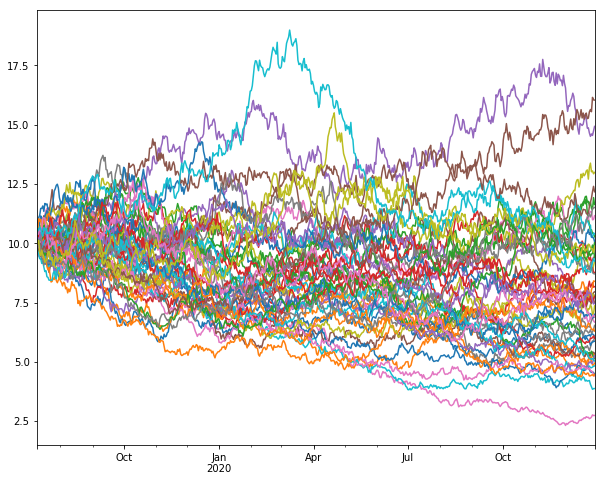

In [19]:
#Graficar
print("Esta gráfica representa el movimiento de los precios correspondientes a Ford Motors Inc")
precios_simulador_F.plot(figsize=(10,8),legend=False);

Esta gráfica representa el movimiento de los precios correspondientes a Volkswagen AG


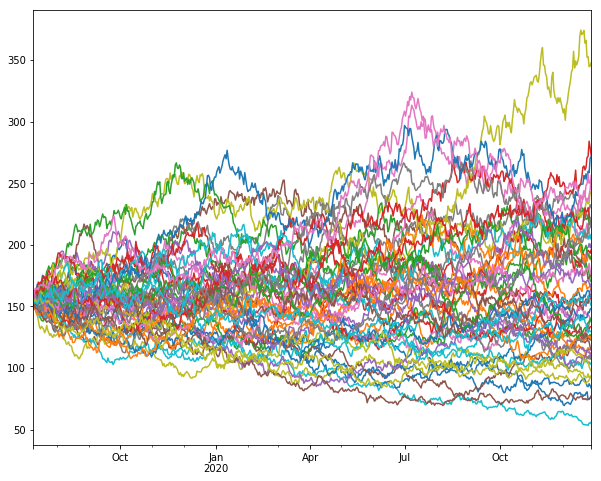

In [20]:
print("Esta gráfica representa el movimiento de los precios correspondientes a Volkswagen AG")
precios_simulador_V.plot(figsize=(10,8),legend=False);

Esta gráfica representa el movimiento de los precios correspondientes a Honda Motors Corp.


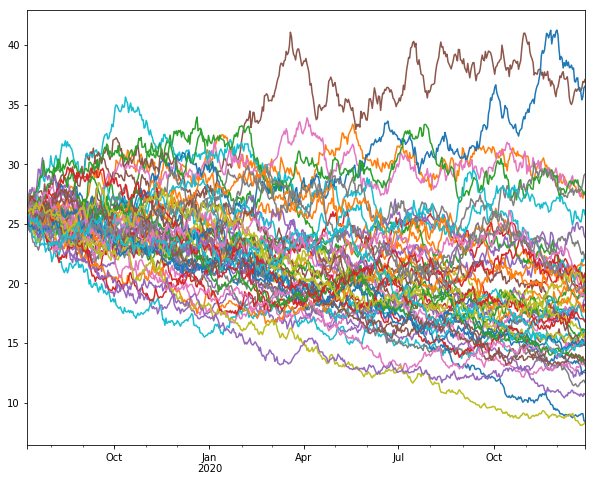

In [21]:
print("Esta gráfica representa el movimiento de los precios correspondientes a Honda Motors Corp.")
precios_simulador_H.plot(figsize=(10,8),legend=False);

Esta gráfica representa el movimiento de los precios correspondientes a Nissan Motors Co.


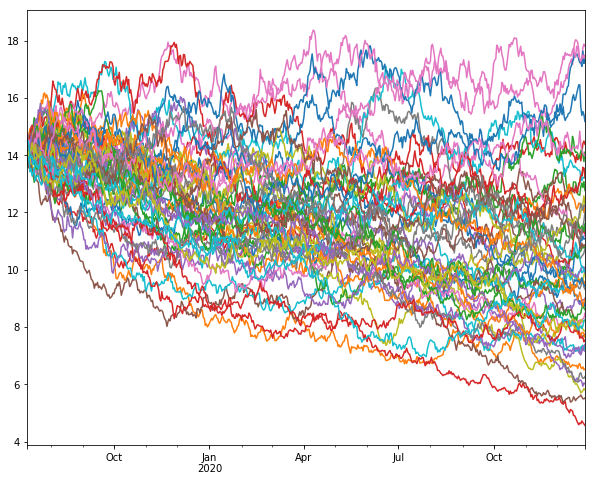

In [22]:
print("Esta gráfica representa el movimiento de los precios correspondientes a Nissan Motors Co.")
precios_simulador_N.plot(figsize=(10,8),legend=False);

**Probabilidad precio umbral**

Ford Umbral 110%


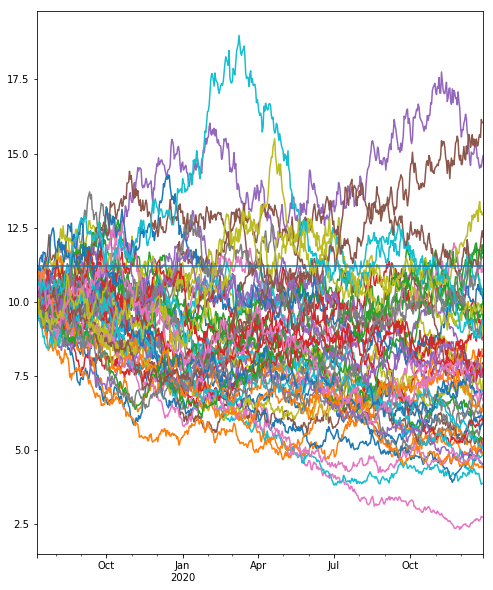

In [36]:
# Umbral de 110% del ultimo precio
KF = cierres.iloc[-1].F*1.1

# Fechas
dates = precios_simulador_F.index

# DataFrame de Umbrales
umbral = pd.DataFrame(index = dates,columns=['KF'],data=KF*np.ones(len(dates)))

# Concatenar y graficar
print('Ford Umbral 110%')
precios_simulador_KF = pd.concat([precios_simulador_F.T,umbral.T]).T
precios_simulador_KF.plot(figsize=(8,10),legend=False);

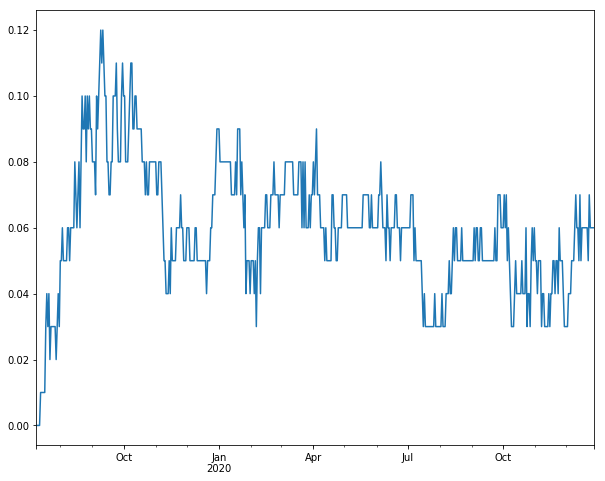

In [28]:
# Comparar cada escenario en cada fecha
TFF = precios_simulador_F > KF
#TF

# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TFF.sum(axis=1)/100)



# Gráfico de probabilidad
prob.plot(figsize=(10,8),legend=False);

Volkswagen Umbral 110%


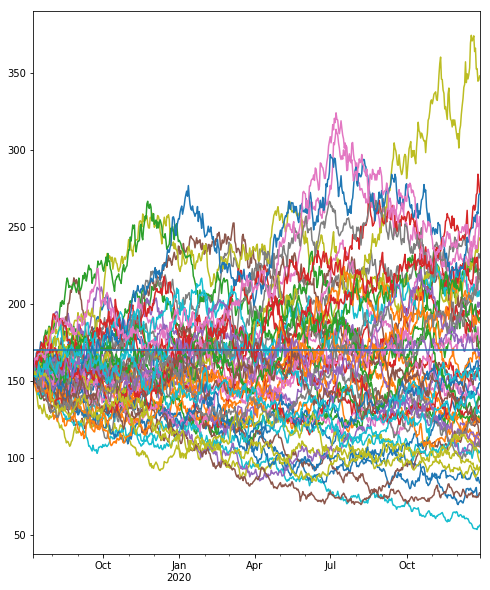

In [38]:
# Umbral de 110% del ultimo precio
KV = cierres.iloc[-1]['VOW3.DE']*1.1

# Fechas
dates = precios_simulador_V.index

# DataFrame de Umbrales
umbral = pd.DataFrame(index = dates,columns=['KV'],data=KV*np.ones(len(dates)))

# Concatenar y graficar
print('Volkswagen Umbral 110%')
precios_simulador_KV = pd.concat([precios_simulador_V.T,umbral.T]).T
precios_simulador_KV.plot(figsize=(8,10),legend=False);

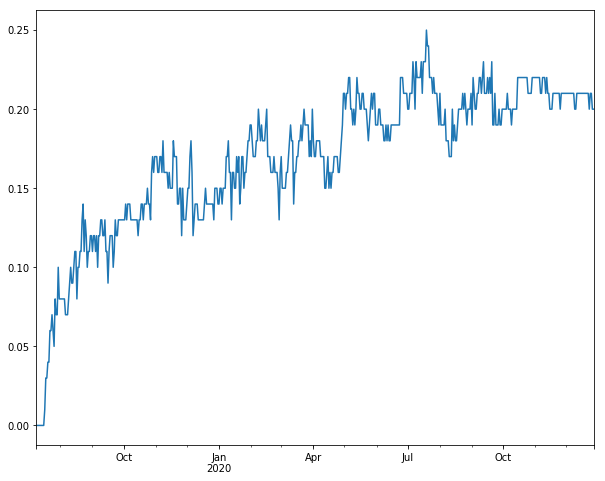

In [39]:
# Comparar cada escenario en cada fecha
TFV = precios_simulador_V > KV
#TF

# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TFV.sum(axis=1)/100)



# Gráfico de probabilidad
prob.plot(figsize=(10,8),legend=False);

Honda Umbral 110%


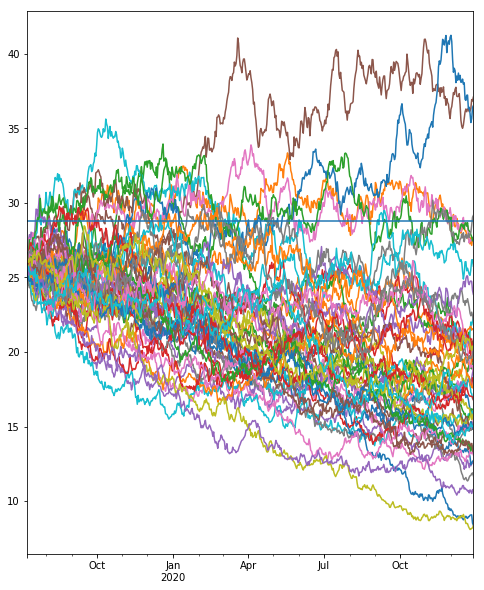

In [41]:
# Umbral de 110% del ultimo precio
KH = cierres.iloc[-1]['HMC']*1.1

# Fechas
dates = precios_simulador_H.index

# DataFrame de Umbrales
umbral = pd.DataFrame(index = dates,columns=['KH'],data=KH*np.ones(len(dates)))

# Concatenar y graficar
print('Honda Umbral 110%')
precios_simulador_KH = pd.concat([precios_simulador_H.T,umbral.T]).T
precios_simulador_KH.plot(figsize=(8,10),legend=False);

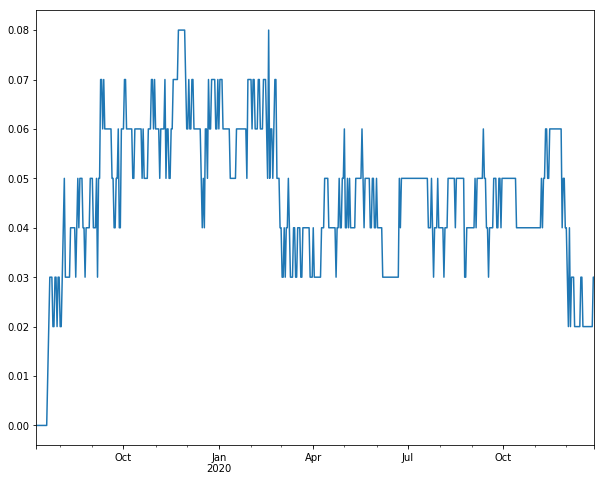

In [42]:
# Comparar cada escenario en cada fecha
TFH = precios_simulador_H > KH
#TF

# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TFH.sum(axis=1)/100)



# Gráfico de probabilidad
prob.plot(figsize=(10,8),legend=False);

Nissan Umbral 110%


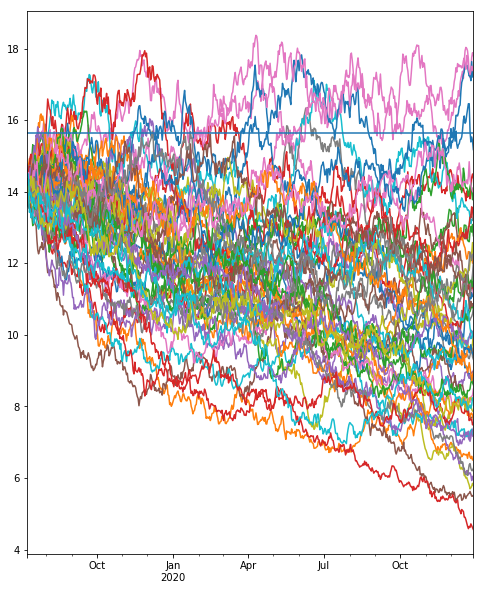

In [43]:
# Umbral de 110% del ultimo precio
KN = cierres.iloc[-1]['NSANY']*1.1

# Fechas
dates = precios_simulador_N.index

# DataFrame de Umbrales
umbral = pd.DataFrame(index = dates,columns=['KN'],data=KN*np.ones(len(dates)))

# Concatenar y graficar
print('Nissan Umbral 110%')
precios_simulador_KN = pd.concat([precios_simulador_N.T,umbral.T]).T
precios_simulador_KN.plot(figsize=(8,10),legend=False);

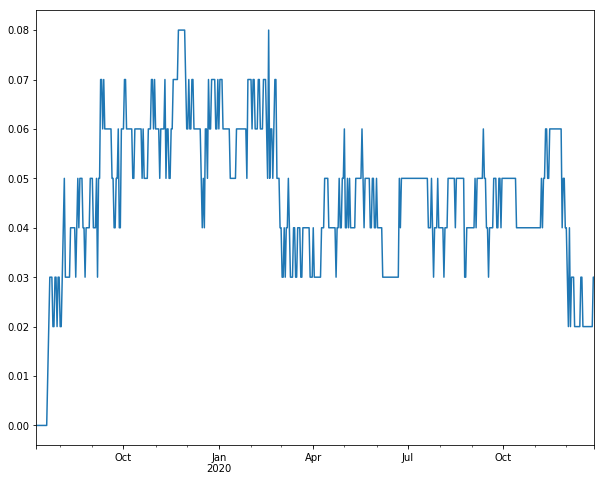

In [44]:
# Comparar cada escenario en cada fecha
TFH = precios_simulador_H > KH
#TF

# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TFH.sum(axis=1)/100)



# Gráfico de probabilidad
prob.plot(figsize=(10,8),legend=False);

### **Analísis de los resultados y conclusiones**

> Como pudimos observar en el proyecto primero Volkswagen es la accion que tiene la mayor valuacion rondando los 140 y 150 dolares, a diferencia de: Ford, Honda y Nissan que estan dentro del rango de precios de 10 a 35 dólares.Es por ello que en el gráfico inicial se aprecia un abismo tan grande como diferencial entre Volkswagen y su competencia evaluada en este proyecto. Al realizar la simulación de rendimientos diarios, se mantiene con una volatilidad dentro de un intérvalo constante, con muy pocas bajas o altas extremas, mientras que Nissan, Ford y Honda son muy volátiles y susceptibles a presentar cambios a lo largo de su comportamiento en el gráfico. Tras calcular la media y desviación estándar de cada empresa a evaluar, obtuvimos una simulación para diversos escenarios de rendimientos de cada una, en donde dichos nuevos rendimientos se convierten a sus respectivos precios.Tras realizar dichas proyecciones de precios y mediante la ayuda de un gráfico que simule dichas proyecciones pudimos tener una mejor idea visual que nos permite realizar un análisis mas puntual y claro de nuestras variables evaluadas. En donde, como a lo largo de la mayor parte de este proyecto, las acciones de Volkswagen se mantienen con un pronóstico constante donde en la mayoría de los escenarios se encuentra por arriba de lo esperado,es decir, su simulación de precios esta subiendo, mientras que Nissan, Ford y Honda se mantienen muy volátiles y con subidas y bajadas prolongadas y extremistas, lo que nos proyecta que dichas empresas no se mantienen constantes o dentro de un intervalo de confianza, estan oscilando entre un intérvalo mayor y con cambios drásticos en su manejo.
Mediante la probabilidad precio umbral, pudimos ver Nissan, Honda y Ford tienen poca probabilidad de superar el 10 %, mientras que Volkswagen llega casi hasta una probabilidad de casi el 25%. 
Sin duda alguna, existe una diferencia bastante grande entre Volkswagen y su competencia evaluada en este proyecto, pues tras realizar ciertas pruebas y ejercicios las acciones de dicha empresa fueron muy constantes y poco volátiles, esto refleja el buen manejo de la empresa y es sin duda una opción fuerte para pensar en una inversión con un retorno constante y con pocas volatilidades. Se adapta al perfil de un inversor conservador, que no quiere correr tantos riesgos y tener un retorno seguro, debido a su tendencia a la alza.

### **Referencias**

Todos los datos fueron obtenido de: https://finance.yahoo.com/